In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/MVSA/MVSA-Single.zip

Streaming output truncated to the last 5000 lines.
 extracting: MVSA_Single/data/3347.txt  
  inflating: MVSA_Single/data/3348.jpg  
  inflating: MVSA_Single/data/3348.txt  
  inflating: MVSA_Single/data/3349.jpg  
 extracting: MVSA_Single/data/3349.txt  
  inflating: MVSA_Single/data/335.jpg  
  inflating: MVSA_Single/data/335.txt  
  inflating: MVSA_Single/data/3350.jpg  
 extracting: MVSA_Single/data/3350.txt  
  inflating: MVSA_Single/data/3351.jpg  
  inflating: MVSA_Single/data/3351.txt  
  inflating: MVSA_Single/data/3352.jpg  
  inflating: MVSA_Single/data/3352.txt  
  inflating: MVSA_Single/data/3353.jpg  
 extracting: MVSA_Single/data/3353.txt  
  inflating: MVSA_Single/data/3354.jpg  
  inflating: MVSA_Single/data/3354.txt  
  inflating: MVSA_Single/data/3355.jpg  
 extracting: MVSA_Single/data/3355.txt  
  inflating: MVSA_Single/data/3356.jpg  
  inflating: MVSA_Single/data/3356.txt  
  inflating: MVSA_Single/data/3357.jpg  
  inflating: MVSA_Single/data/3357.txt  
  inflat

In [4]:
import os

In [5]:
img_names = []
text_transcriptions = []
for files in sorted(os.listdir("/content/MVSA_Single/data")):
  if files.endswith(".jpg"):
    img_names.append(files)
  else:
    file1 = open(os.path.join("/content/MVSA_Single/data",files),"rb")
    text_transcriptions.append(file1.readline())

In [6]:
# img_names

In [7]:
# text_transcriptions

In [8]:
import pandas as pd


In [9]:
df_ = pd.DataFrame(zip(img_names,text_transcriptions),columns = ['img_names','text_transcriptions'])

In [10]:
df = pd.read_csv("/content/MVSA_Single/labelResultAll.txt")

In [12]:
df.head()

,ID\ttext,image
0,1\tneutral,positive
1,2\tneutral,positive
2,3\tneutral,positive
3,4\tpositive,positive
4,5\tpositive,positive


In [13]:
df['ID'] = df['ID\ttext'].apply(lambda x :x.split('\t')[0])
df['text'] = df['ID\ttext'].apply(lambda x :x.split('\t')[1])
df.drop(columns = ['ID\ttext'],inplace = True)

In [14]:
df.head()

,image,ID,text
0,positive,1,neutral
1,positive,2,neutral
2,positive,3,neutral
3,positive,4,positive
4,positive,5,positive


In [15]:
df['ID'] = df['ID'] + ".jpg"

In [16]:
df.head()

,image,ID,text
0,positive,1.jpg,neutral
1,positive,2.jpg,neutral
2,positive,3.jpg,neutral
3,positive,4.jpg,positive
4,positive,5.jpg,positive


In [17]:
df.columns = ['image_label','img_names','text_labels']

In [18]:
df_.head()

,img_names,text_transcriptions
0,1.jpg,b'How I feel today #legday #jelly #aching #gym...
1,10.jpg,b'@ArrivaTW absolute disgrace two carriages fr...
2,100.jpg,"b""This is my Valentine's from 1 of my nephews...."
3,1000.jpg,"b""betterfeelingfilms: RT via Instagram: First ..."
4,1001.jpg,"b""Zoe's first love #Rattled @JohnnyHarper15 \r\n"""


In [19]:
df_final = pd.merge(df, df_, on="img_names")


In [20]:
df_final.shape

(4869, 4)

In [21]:
df_final.head()

,image_label,img_names,text_labels,text_transcriptions
0,positive,1.jpg,neutral,b'How I feel today #legday #jelly #aching #gym...
1,positive,2.jpg,neutral,b'grattis min griskulting!!!???? va bara tvung...
2,positive,3.jpg,neutral,b'RT @polynminion: The moment I found my favou...
3,positive,4.jpg,positive,b'#escort We have a young and energetic team a...
4,positive,5.jpg,positive,b'RT @chrisashaffer: Went to SSC today to be a...


In [22]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 14.1 MB/s 
     |████████████████████████████████| 596 kB 61.8 MB/s 
     |████████████████████████████████| 895 kB 61.6 MB/s 
     |████████████████████████████████| 6.8 MB 37.7 MB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [23]:
import pandas as pd

In [24]:
df = df_final

In [25]:
from transformers import (
   AutoConfig,
   AutoTokenizer,
   TFAutoModelForSequenceClassification,
   AdamW,
   glue_convert_examples_to_features
)
import tensorflow as tf
import tensorflow_datasets as tfds
import json

In [26]:

import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
# RANDOM_SEED = 42
# np.random.seed(RANDOM_SEED)
# torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [27]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6006701117333073717
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15371862016
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15883649190058919185
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

In [28]:
from torchvision import datasets, transforms


In [29]:
from PIL import Image
import requests
from transformers import VisionTextDualEncoderModel, VisionTextDualEncoderProcessor, ViTFeatureExtractor, BertTokenizer

In [30]:
from transformers import RobertaTokenizer
from transformers import DeiTFeatureExtractor, DeiTModel

In [31]:
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
feature_extractor = DeiTFeatureExtractor.from_pretrained("facebook/deit-base-distilled-patch16-224")
processor = VisionTextDualEncoderProcessor(feature_extractor, tokenizer)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/287 [00:00<?, ?B/s]

In [ ]:
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [32]:
tokenizer.model_max_length = 96

In [ ]:
tokenizer

PreTrainedTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=96, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [33]:
processor = VisionTextDualEncoderProcessor(feature_extractor, tokenizer)

In [34]:
_transforms = transforms.Compose(
    [
        transforms.Resize((448, 448)),
        # transforms.RandomResizedCrop(224),
        # transforms.RandomHorizontalFlip(),
        # transforms.ToTensor()
    ]
    
)

In [35]:
# processor()

In [36]:

class GPReviewDataset(Dataset):
  def __init__(self, Text,image, Label, processor):
    self.Text = Text
    self.image = image
    self.Label = Label
    # self.tokenizer = tokenizer
    # self.feature_extractor = feature_extractor
    self.processor = processor
    # self.max_len = max_len
  def __len__(self):
    return len(self.Text)
  def __getitem__(self, item):
    img_path = self.image[item]
    img = Image.open("/content/MVSA_Single/data/"+img_path).convert('RGB')
    img_transformed = _transforms(img)
    Text = str(self.Text[item])
    Label = self.Label[item]
    inputs = processor(text=Text, images=img_transformed, return_tensors="pt", padding='max_length',truncation=True)
    # inputs = inputs.squeeze(0)
    # print(Text)
    # print(img_transformed.shape)
    # print(Label.shape)
    # print(inputs.input_ids.shape)
    # print(Text)
    # print(Text)
    # print(inputs.pixel_values.shape)
    return {
      'input_ids': inputs.input_ids.squeeze(0),
      'attention_mask': inputs.attention_mask.squeeze(0),
      'pixel_values' : inputs.pixel_values.squeeze(0),
      'Label': torch.tensor(Label, dtype=torch.long)
    }



In [37]:

df

,image_label,img_names,text_labels,text_transcriptions
0,positive,1.jpg,neutral,b'How I feel today #legday #jelly #aching #gym...
1,positive,2.jpg,neutral,b'grattis min griskulting!!!???? va bara tvung...
2,positive,3.jpg,neutral,b'RT @polynminion: The moment I found my favou...
3,positive,4.jpg,positive,b'#escort We have a young and energetic team a...
4,positive,5.jpg,positive,b'RT @chrisashaffer: Went to SSC today to be a...
...,...,...,...,...
4864,positive,5125.jpg,neutral,b'http://t.co/Y4ZrSmq2KB http://t.co/L\xa1\xad...
4865,neutral,5126.jpg,positive,b'YES! #sinful #food #freefrom #glutenfree #su...
4866,positive,5127.jpg,positive,"b'RT @bookmyshow: #Disney\'s lies - ""Every day..."
4867,positive,5128.jpg,neutral,b'RT @MUBMI: TWO MORE DAYS to submit your apps...


In [38]:
df = df.drop(columns = ['image_label'])

In [39]:
df.columns = ['file_name','label','Text Transcription']

In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [41]:
import re

In [42]:
df['label'] = le.fit_transform(df['label'])

In [43]:
df_train, df_val = train_test_split(
  df,
  test_size=0.20,
  stratify = df.label.values,
  random_state=42
)
df_val, df_test = train_test_split(
  df_val,
  test_size=0.50,
  stratify = df_val.label.values,
  random_state=42
)


df_train.shape, df_val.shape,df_test.shape

((3895, 3), (487, 3), (487, 3))

In [44]:
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [45]:


def create_data_loader(df, processor, batch_size):
  ds = GPReviewDataset(
    Text=df['Text Transcription'].to_numpy(),
    image = df.file_name.to_numpy(),
    Label=df.label.to_numpy(),
    processor=processor
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=0
  )

In [46]:
BATCH_SIZE = 8
train_data_loader = create_data_loader(df_train, processor, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, processor, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, processor, BATCH_SIZE)

In [47]:

class SentimentClassifier(nn.Module):
  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = VisionTextDualEncoderModel.from_vision_text_pretrained("facebook/deit-base-distilled-patch16-224", "roberta-base")
    
    self.drop = nn.Dropout(p=0.30)
    self.out = nn.Linear(1024, n_classes)
  def forward(self, input_ids, attention_mask,pixel_values):
    outputs = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      pixel_values=pixel_values,
      return_dict=True)
    output = self.drop(torch.cat((outputs.text_embeds,outputs.image_embeds),1))
    return self.out(output)

In [48]:
class_names = le.classes_

In [49]:
modell = SentimentClassifier(len(class_names))
modell = modell.to(device)

Downloading:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/deit-base-distilled-patch16-224 were not used when initializing DeiTModel: ['cls_classifier.weight', 'distillation_classifier.bias', 'cls_classifier.bias', 'distillation_classifier.weight']
- This IS expected if you are initializing DeiTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DeiTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DeiTModel were not initialized from the model checkpoint at facebook/deit-base-distilled-patch16-224 and are newly initialized: ['deit.pooler.dense.bias', 'deit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The projection layer and logit scale weights `['visual_projection.weight', 'text_projection.weight', 'logit_scale']` are newly initialized. You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [50]:
EPOCHS = 3
optimizer = AdamW(modell.parameters(), lr=2e-5, correct_bias=True)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [51]:
loss_fn = nn.CrossEntropyLoss().to(device)

In [52]:

def train_epoch(
  modell,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples):
  modell = modell.train()
  losses = []
  correct_predictions = 0
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    pixel_values = d['pixel_values'].to(device)
    Label = d["Label"].to(device)
    outputs = modell(
      input_ids=input_ids,
      attention_mask=attention_mask,
      pixel_values = pixel_values
    )
    
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, Label)
    correct_predictions += torch.sum(preds == Label)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(modell.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

In [53]:
def eval_model(modell, data_loader, loss_fn, device, n_examples):
  modell = modell.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      pixel_values = d['pixel_values'].to(device)
      Label = d["Label"].to(device)
      outputs = modell(
        input_ids=input_ids,
        attention_mask=attention_mask,
        pixel_values = pixel_values
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, Label)
      correct_predictions += torch.sum(preds == Label)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [54]:

%%time
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    modell,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')
  val_acc, val_loss = eval_model(
    modell,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save(modell.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/3
----------
Train loss 0.9675478978078713 accuracy 0.6179717586649551
Val   loss 0.9060529069822343 accuracy 0.7063655030800822

Epoch 2/3
----------
Train loss 0.8424194276455247 accuracy 0.7702182284980745
Val   loss 0.8586521168224147 accuracy 0.7268993839835729

Epoch 3/3
----------
Train loss 0.7631586244218893 accuracy 0.8254172015404365
Val   loss 0.8584473729133606 accuracy 0.7145790554414785

CPU times: user 8min 7s, sys: 1min 38s, total: 9min 45s
Wall time: 9min 53s


In [55]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  id = []
  ip = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      # texts = d["Text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      pixel_values = d['pixel_values'].to(device)
      targets = d["Label"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask,
        pixel_values = pixel_values
      )
      _, preds = torch.max(outputs, dim=1)
      # ids = d['ID']
      # ips = d['img_path']
      # probs = F.softmax(outputs, dim=1)
      
      # review_texts.extend(texts)
      predictions.extend(preds)
      # id.extend(ids)
      # ip.extend(ips)
      # prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  # idss = id
  # ipss = ip
  # prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return real_values,predictions

In [57]:
real_values,y_pred = get_predictions(
  modell,
  test_data_loader
)

In [58]:
print(classification_report(real_values, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       122
           1       0.77      0.74      0.76       192
           2       0.77      0.75      0.76       173

    accuracy                           0.74       487
   macro avg       0.73      0.74      0.73       487
weighted avg       0.74      0.74      0.74       487



              precision    recall  f1-score   support

           0       0.65      0.72      0.68       122
           1       0.77      0.74      0.76       192
           2       0.77      0.75      0.76       173

    accuracy                           0.74       487
   macro avg       0.73      0.74      0.73       487
weighted avg       0.74      0.74      0.74       487



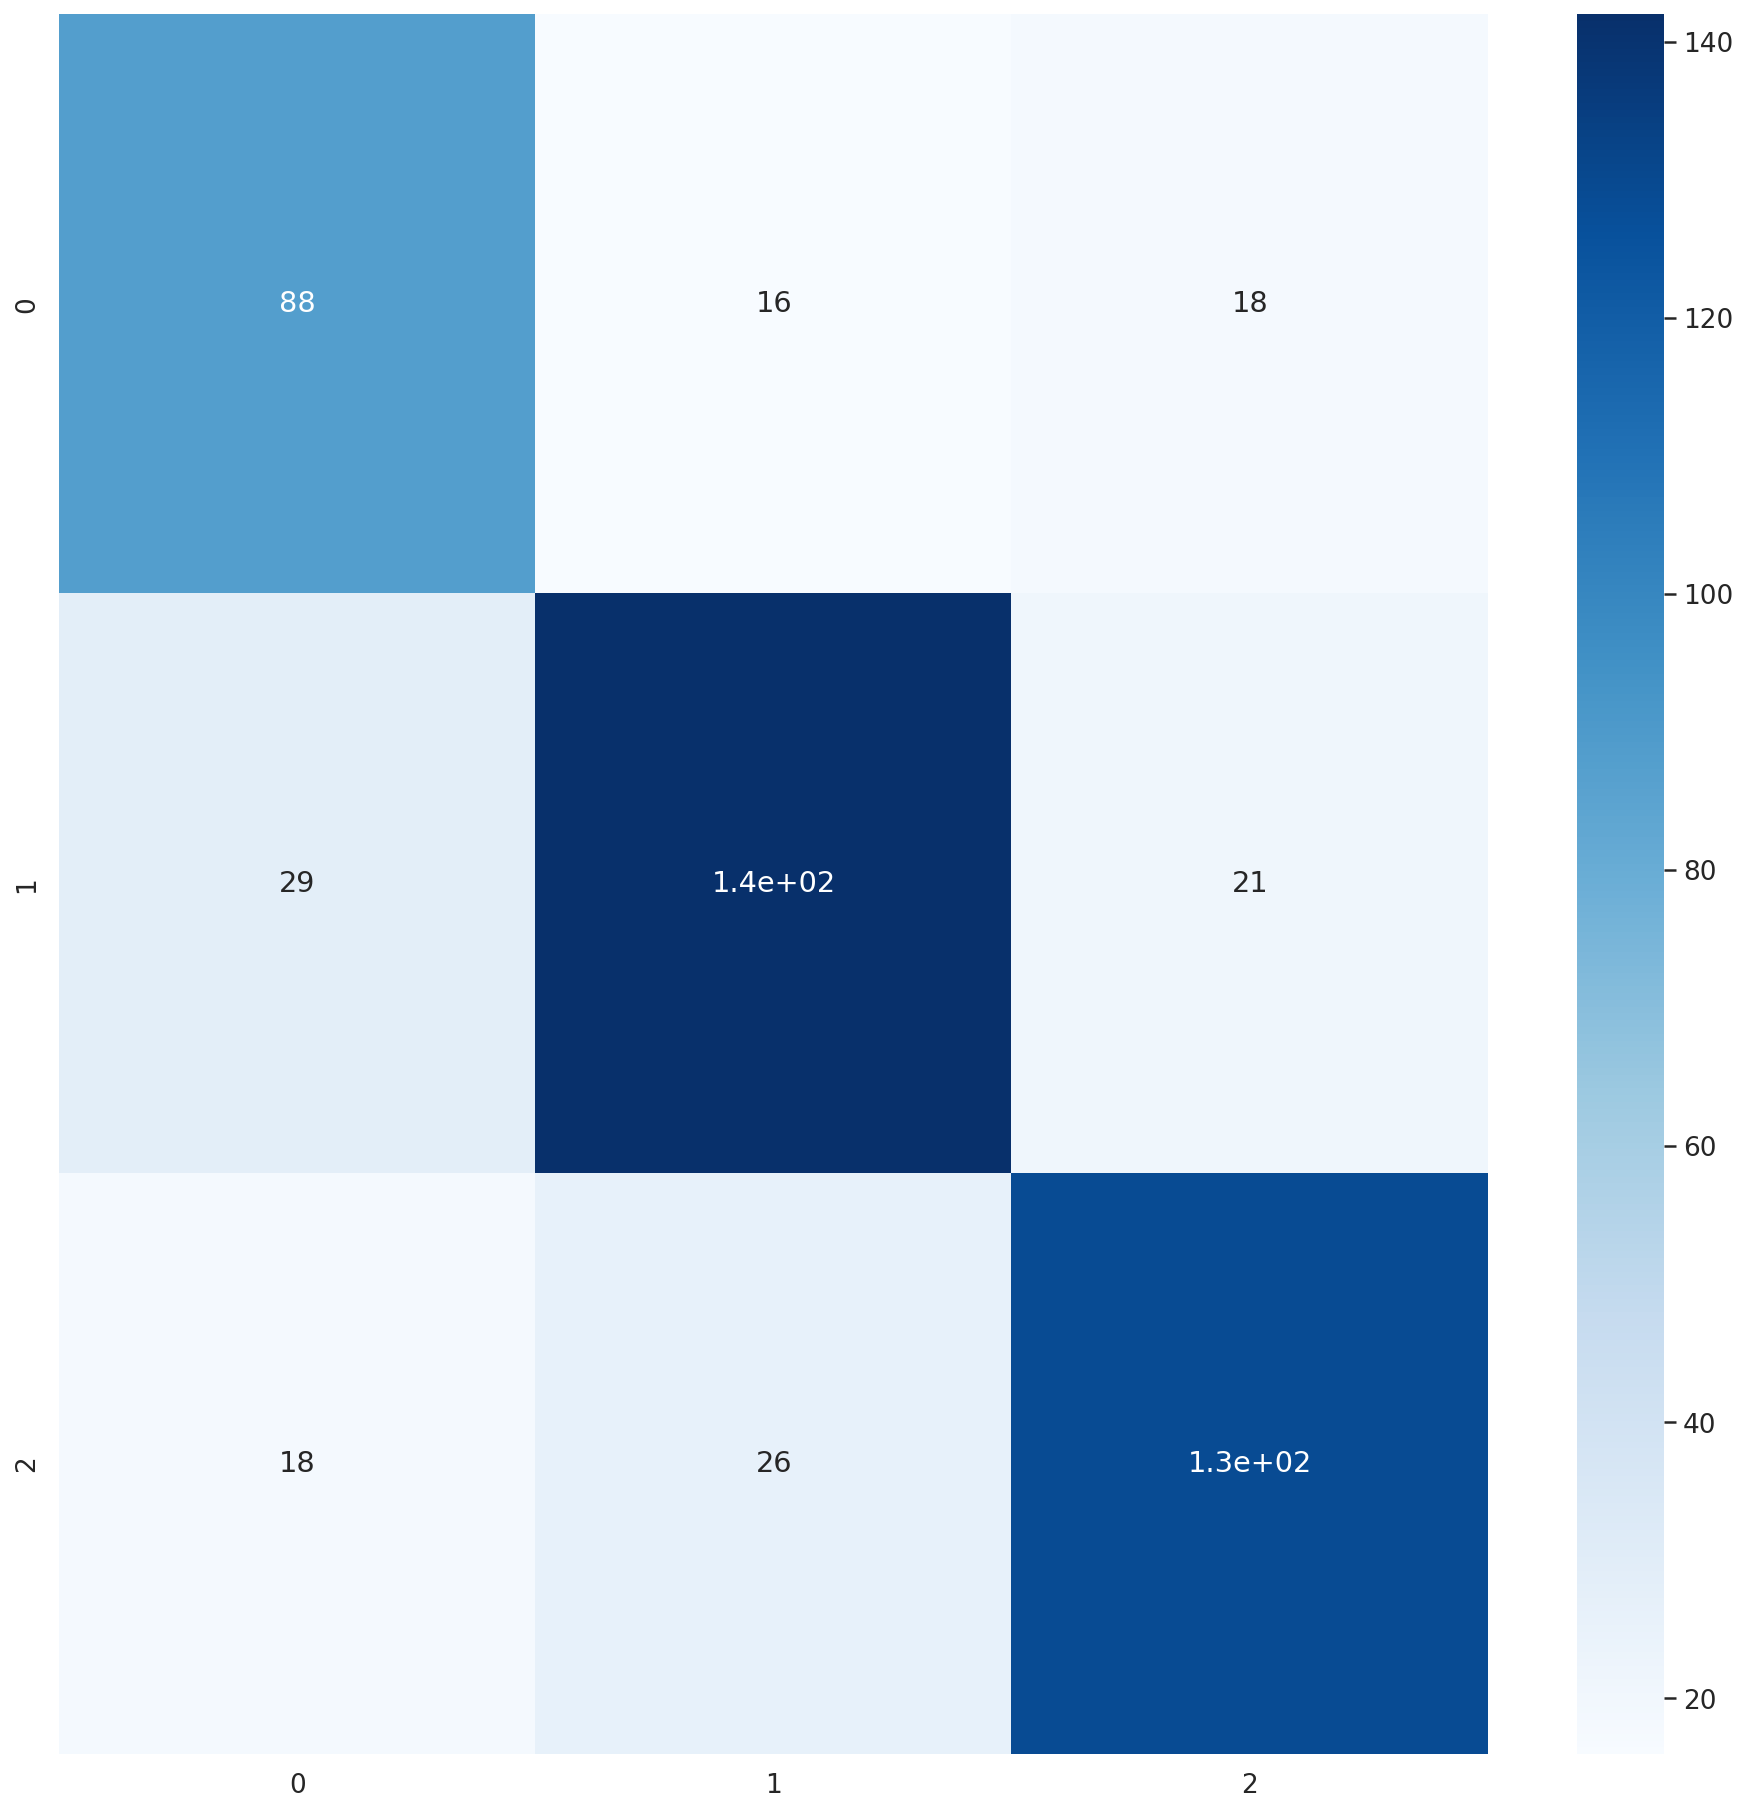

In [59]:
confusionmatrix = confusion_matrix(real_values, y_pred)
plt.figure(figsize = (16, 16))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True)

print(classification_report(real_values, y_pred))